# SENTIMENT ANALYSIS OF NEWS HEADLINES

 While, the factors that impact the stock prices are very dynamic, the financial sector does give a lot of importance to news. That would reflect in the stock prices somehow, and we have already witnessed ocassions where sentiments have taken precedence over market fundamentals. We will evaluate the market sentiments from  news headlines, using the ‘nltk.sentiment.vader’ library. After getting all the sentiment scores, we would develop a Classifier to predict the sentiments from any given day's news.

In [1]:
# Basic imports of python for wrangling and display.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set(style='whitegrid', context='talk', palette='Dark2')


In [2]:
# News is extracted from the availabe dataset.
news = pd.read_csv('news.csv', parse_dates=['publish_date'])

### Series of Stock prices

The news data is very vast and they represent several topics. It is crucial to extract or filter the news that would be most related with the stock prices. So I have selected a ticker from BSE-SENSEX and we could explore its relation with news sentiments for the same period of time.

In [3]:
# These historical prices have been downloaded from Yahoo Finance
stock=pd.read_csv('RELIANCE.BO (1).csv')

In [4]:
# The stock price series are resampled to daily frequency, which also takes care of the missing days.
stock['Date'] = pd.to_datetime(stock['Date'])
stock = stock.set_index('Date')
stock = stock.resample('D').fillna(method ='ffill')
stock = stock.fillna(method ='ffill')
stock = stock[['Close']]
stock = stock.loc[pd.date_range(start ='2009-01-02', end ='2009-12-30')]

In [5]:
stock.head()

,Close
2009-01-02,320.975006
2009-01-03,320.975006
2009-01-04,320.975006
2009-01-05,341.437988
2009-01-06,342.013000


### Sentiment Analysis of all available news for relevant year. 

Now here we would analyse all the news headlines for the selected year. For this, we have passed each headline to the sentiment analyser.

In [6]:
# Cleaning the rows by dropping the missing values and duplicate rows. In cases where a headline has been repeated, it needs to be taken care of, so that they are not over weighted in vecotr format.

news = news[news['publish_date'].dt.year == 2009].dropna()
news = news[['publish_date', 'headline_text']].drop_duplicates(subset=['headline_text']).reset_index()


In [ ]:
# Nltk is an amazing library for Natural Language processing

import nltk
nltk.download('all')

Let's create a Sentiment Analyser object and pass the headlines to it. Then we can  capture the sentiment scores in a DataFrame.

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sia = SentimentIntensityAnalyzer()
results = []

for line in news['headline_text']:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
    pol_score = sia.polarity_scores(line)
    results.append(pol_score)



In [8]:
df = pd.DataFrame(results)

Now we can combine the scores with the headlines and label them. Scores above .2 are labelled as 1(positive), below -.2 are labelled as -1(negative) and intermediate scores are labelled 0(neutral).


In [9]:
# Now we can combine the scores with the headlines and label them. Scores above .2 are labelled as 1(positive), below -.2 are labelled as -1(negative) and intermediate scores are labelled 0(neutral).

newdf = pd.concat([news,df], axis=1)
newdf['label'] = 0
newdf.loc[newdf['compound'] >= 0.2, 'label'] = 1
newdf.loc[newdf['compound'] < -0.2, 'label'] = -1
newdf.head()

,index,publish_date,headline_text,neg,neu,pos,compound,label
0,656460,2009-01-01,Sterling performance for your eyes only,0.000,1.000,0.0,0.0000,0
1,656461,2009-01-01,Six common medical myths debunked,0.000,1.000,0.0,0.0000,0
2,656462,2009-01-01,Tired? Saunter amid greens,0.492,0.508,0.0,-0.4404,-1
3,656463,2009-01-01,No New Years bash for Krishna,0.306,0.694,0.0,-0.2960,-1
4,656464,2009-01-01,Second-year arts student finds a way to beat t...,0.000,1.000,0.0,0.0000,0


Text(0, 0.5, 'Count of news headlines')

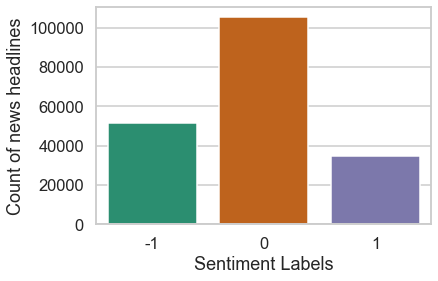

In [10]:
# Let's see the count of headlines under each label
sns.barplot(x = newdf['label'].value_counts().index, y = newdf['label'].value_counts())
plt.xlabel('Sentiment Labels')
plt.ylabel('Count of news headlines')

In [11]:
newdf['label'].value_counts()

 0    105285
-1     51405
 1     34677
Name: label, dtype: int64

Now we have 51405 headlines which are negative(-1) and 34677 headlines which are positive(+1).

Lets look at the correlation between the news sentiments and headlines. We first calculate the sum of these labels for a given day. Generally, news are likely to impact the stock prices of the following day so the scores are shifted by a day. 

In [12]:
df2 = newdf.groupby('publish_date')['label'].sum()
df3 = df2.resample('D').fillna(method = 'ffill')
df = pd.concat([stock, df3], axis = 1).dropna()
df['shift_label'] = df['label'].shift()
df[['Close', 'shift_label']].corr()

,Close,shift_label
Close,1.000000,0.046758
shift_label,0.046758,1.000000


In [ ]:
The correlation is around 4% which is weak. This is due to the fact that we have included all headlines in general.

### Sentiment Analysis of selective news for relevant year

Let's take a relook at the dataset and select the categories that closely represents the financial sector. The stock being a Sensex ticker is more responsive to macro level financial news. I would also recommend to use more filters i.e words that would be specific to the company and the industry it represents.

In [42]:
news = pd.read_csv('news.csv', parse_dates = ['publish_date'])

In [43]:
 pd.options.display.max_rows = 200

In [44]:
news['headline_category'].value_counts().head(200)

india                                          143710
unknown                                        134195
business.india-business                         50144
city.delhi                                      46247
city.mumbai                                     42581
city.bengaluru                                  40641
city.lucknow                                    35305
city.hyderabad                                  35088
city.chandigarh                                 34679
city.ahmedabad                                  34059
city.patna                                      31217
city.pune                                       29507
city.kolkata                                    29153
entertainment.hindi.bollywood                   27819
sports.icc-world-cup-2015                       24006
city.chennai                                    12974
edit-page                                       11730
city.goa                                        11539
entertainment.english.hollyw

In [45]:
# Here we select relevant news categories and create a column 'ticker' with an indicator 1 for selected category.

news['ticker'] = news['headline_category'].apply(lambda x: np.where('business.india-business' in x or 'top-headlines' in x or 'business' in x , 1,0 ))

In [46]:
len(news)

1048575

Here we have around 9000 hnews headlines for the year in consideration. Now we can repeat the steps for computing the Sentiment scores.

In [47]:
news = news[(news['ticker'] == 1) & (news['publish_date'].dt.year == 2009)].dropna()
news = news[['publish_date', 'headline_text']].drop_duplicates(subset = ['headline_text'])

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# Instantiate the sentiment intensity analyzer with the existing lexicon
sia = SentimentIntensityAnalyzer()

# New words and values
#new_words = {    'crushes': 10,    'beats': 5,    'misses': -5,    'trouble': -10,    'falls': -10,}

# Update the lexicon
#sia.lexicon.update(new_words)


results = []

for line in news['headline_text']:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
    pol_score = sia.polarity_scores(line)
    results.append(pol_score)

# Convert the results into a DataFrame
news = news.reset_index()
df = pd.DataFrame(results)
df2 = pd.concat([news,df], axis=1)

# Assign labels
df2['label'] = 0
df2.loc[df2['compound'] >= 0.2, 'label'] = 1
df2.loc[df2['compound'] < -0.2, 'label'] = -1
df2.head()

,index,publish_date,headline_text,neg,neu,pos,compound,label
0,656552,2009-01-01,Bajaj brothers withdraw petitions from CLB,0.000,1.000,0.000,0.0000,0
1,656553,2009-01-01,BSNL offers IPTV services,0.000,1.000,0.000,0.0000,0
2,656554,2009-01-01,ICICI slashes home loan rate,0.310,0.690,0.000,-0.2023,-1
3,656555,2009-01-01,Jet sweetens its fare cut,0.344,0.656,0.000,-0.2732,-1
4,656556,2009-01-01,AI aims to win back market leadership: CMD,0.000,0.648,0.352,0.5859,1


Text(0, 0.5, 'Count of news headlines')

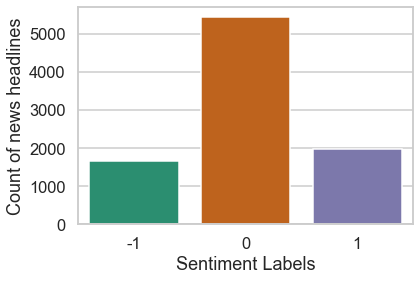

In [50]:
sns.barplot(x = df2['label'].value_counts().index, y = df2['label'].value_counts())
plt.xlabel('Sentiment Labels')
plt.ylabel('Count of news headlines')

In [51]:
df2['label'].value_counts()

 0    5442
 1    1968
-1    1668
Name: label, dtype: int64

There are 1968 positive headlines and 1668 negative headlines.

### Correlation between news sentiments and stock prices

In [52]:
# Exclude 0 labels
df2 = df2.loc[(df2['label'] != 0), :]


In [53]:

df3 = df2.groupby('publish_date')['label'].sum()
df3 = df3.resample('D').fillna(method ='ffill')
df = pd.concat([stock, df3], axis = 1).dropna()
df['shift_label'] = df['label'].shift()
df[['Close', 'shift_label']].corr()

,Close,shift_label
Close,1.000000,0.179939
shift_label,0.179939,1.000000


The correlation of 18% is much better here as being selective paid off. And there is more room for improvement.

### Sentiment Classifier

In [54]:
# We can create a model that learns from teh past data of newsheadlines and use it to predict the sentimaent labels directly for each new piece of headline.
# Now we import the classification algorithms, classififcation metrics and shuffle split. We also import count vertorizer which will convert the headlines in vector form. 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [55]:
X = df2['headline_text']
y = df2['label']


# Create a Shuffle split object and count vectorizer object
ssplit = ShuffleSplit(n_splits=10, test_size=0.2)
vect = CountVectorizer(max_features=700, binary=True) #(max_features=1000, binary=True)

# Prepare a list of Classification models
models = [
    MultinomialNB(),
    LinearSVC(),
    RandomForestClassifier(),
    LogisticRegression()
    ]

# Create a dictionary to store the metric scores for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}


# Iterate for each train test split
for train_index, test_index in ssplit.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train = vect.fit_transform(X_train)
    X_test = vect.transform(X_test)
    
    
    # Fit Naive Bayes on the vectorized X and y train labels
    # then predict new y labels using X test
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Determine test set accuracy and weighted f1 score on this fold.
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average = 'weighted')
        cm = confusion_matrix(y_test, y_pred)
        
        # Update the list
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
    


In [56]:
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)

MultinomialNB
------------------------------
        Avg. Accuracy: 81.95%
        Avg. F1 Score: 81.95
        Avg. Confusion Matrix: 
        
[[271.1  66.3]
 [ 65.1 325.5]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 81.33%
        Avg. F1 Score: 81.32
        Avg. Confusion Matrix: 
        
[[266.6  70.8]
 [ 65.1 325.5]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 81.09%
        Avg. F1 Score: 81.10
        Avg. Confusion Matrix: 
        
[[274.3  63.1]
 [ 74.6 316. ]]
        
LogisticRegression
------------------------------
        Avg. Accuracy: 82.42%
        Avg. F1 Score: 82.37
        Avg. Confusion Matrix: 
        
[[264.1  73.3]
 [ 54.7 335.9]]
        



All these models have around the same level(80% to 82%) of Accuracy and Weighted F1 score. Logsitic Regression has a slightly better accuracy but the False negatives are higher that false posiives.In this regards Multinomial NB classifer would be better.

References and Resources:
    1. https://www.kaggle.com/rohit0906/stock-sentiment-analysis-using-news-headlines
    2. https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
    3. https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python